In [20]:
using LaTeXStrings

In [11]:
# Compute the derivative of N(t)
deriv_Nt(nt, K, r) = r*nt*(1-nt/K)

# Compute N(t + h)
next_Nt(nt, K, r, h) = nt + h*deriv_Nt(nt, K, r)

next_Nt (generic function with 1 method)

In [12]:
# 各種パラメータを定義
tmax = 10.0 # 終了時刻
r = 1.0 # パラメータ1
K = 10.0 #パラメータ2
N0 = 1.0 # 人口の初期値
numtimes  = 100 # 0 ≦ t < tmaxの分割数

h = tmax/numtimes

0.1

In [15]:
results = Vector{Float64}(undef, numtimes+1)

# 初期値
results[1] = N0

# 時間発展
for t in 1:numtimes
    results[t+1] = next_Nt(results[t], K, r, h)
end

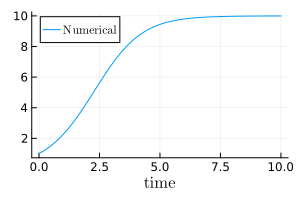

In [28]:
using Plots

times = LinRange(0, tmax, numtimes+1)

plot(times, results, label=L"\mathrm{Numerical}", xlabel=L"\mathrm{time}", size = (300, 200))

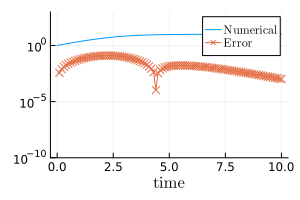

In [26]:
exact_Nt(time) = K/(1+(K-N0) / N0 * exp(-r*time))

p = plot(yaxis=:log, ylims=(1e-10, 1000),  xlabel=L"\mathrm{time}", size = (300, 200))
plot!(p, times, results, label=L"\mathrm{Numerical}")
plot!(p, times, abs.(results .- exact_Nt.(times)), marker=:x, label=L"\mathrm{Error}")

In [18]:
using DifferentialEquations

# ロジスティック方程式の定義
function logistic!(du, u, params, t)
    r, K = params
    du[1] = r * u[1] * (1 - u[1]/K)
end

# パラメータの設定
params = (r, K)

# 初期条件の設定
u0 = [1.0]  # 開始時点の人口サイズ

# 時間範囲の設定
tspan = (0.0, tmax)

# 問題の設定
prob = ODEProblem(logistic!, u0, tspan, params)

# 微分方程式の解 (5次のルンゲクッタ法)
sol = solve(prob, Tsit5(), abstol=1e-8, reltol=1e-8)
;

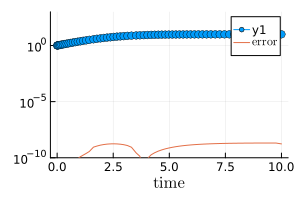

In [25]:
# 解のプロット

results_de = [u_[1] for u_ in sol.u]

p = plot(yaxis=:log, ylims=(1e-10, 1000),  xlabel=L"\mathrm{time}", size = (300, 200))
plot!(p, sol.t, results_de, marker=:o)
plot!(p, sol.t, abs.(results_de .- exact_Nt.(sol.t)), label=L"\mathrm{error}")